# KRAS Mutation Frequency

This notebook creates a bar chart that shows the frequency of different KRAS mutations found across 6 cancers with data for KRAS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import cptac
import cptac.utils as u
import plot_utils as p
import cptac.pancan as pc
import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
print('cptac version:', cptac.version())

cptac version: 1.1.0


# Step 1: Create dataframe with Mutation Types

For each cancer type, create a data frame that has the mutation type for each sample.

First, load in the cancer data sets from cptac

In [3]:
g = pc.PancanGbm()
hn = pc.PancanHnscc()
l = pc.PancanLuad()
o = pc.PancanOv()
c = pc.PancanCcrcc()
col = pc.PancanCoad()
b = pc.PancanBrca()
ls = pc.PancanLscc()
en = pc.PancanUcec()

Next, call get_genotype_all_vars for KRAS for each cancer type. This returns a df with columns for Mutation (type of mutation), Location (location of the mutation), and Mutation_Status (wildtype, single, or multiple mutations). For samples with multiple mutations, a single mutation was reported based on the following priority: deletion, truncation, missense, amplification, inframe, silent, and wildtype.

In [4]:
gene = "KRAS" 

In [5]:
endo = en.get_genotype_all_vars(gene, 'washu')
gbm = g.get_genotype_all_vars(gene, 'washu')
hnscc = hn.get_genotype_all_vars(gene, 'washu')
ovar = o.get_genotype_all_vars(gene, 'washu')
cc = c.get_genotype_all_vars(gene, 'washu')
colon = col.get_genotype_all_vars(gene, 'washu')
ld = l.get_genotype_all_vars(gene, 'washu')
lscc = ls.get_genotype_all_vars(gene, 'washu')
brca = b.get_genotype_all_vars(gene, 'washu')

In [6]:
# example
gbm

Name,KRAS,Mutation
Patient_ID,,
C3L-00104,0.04736,No_Mutation
C3L-00365,-0.08330,No_Mutation
C3L-00674,-0.03360,No_Mutation
C3L-00677,-0.27453,Deletion
C3L-01040,0.00718,No_Mutation
...,...,...
C3N-03183,0.05837,No_Mutation
C3N-03184,-0.03438,No_Mutation
C3N-03186,-0.01568,No_Mutation


# Step 2: Match Mutation Labels

We simplified labels for the final figure. We grouped mutations together to create the Indel and Truncation categories. In_Frame_Indel includes: In_Frame_Ins and In_Frame_Del. Truncation includes: Nonsense_Mutation, Frame_Shift_Del, and Frame_Shift_Ins.

In [7]:
# Simplify mutation names, create truncation and indel groups
dfs = [endo, ovar, colon, lscc, ld, brca]
for df in dfs:
    df['Mutation'].where(df['Mutation'] != 'Missense_Mutation', 'Missense', inplace = True) # replace when false
    df['Mutation'].where(df['Mutation'] != 'Wildtype_Tumor', 'Wildtype', inplace = True)
    df["Mutation"].where(df['Mutation'] != 'In_Frame_Del', 'Indel', inplace = True)
    df["Mutation"].where(df['Mutation'] != 'In_Frame_Ins', 'Indel', inplace = True)
    df["Mutation"].where(df['Mutation'] != 'Nonsense_Mutation', 'Truncation', inplace = True)
    df["Mutation"].where(df['Mutation'] != 'Frame_Shift_Del', 'Truncation', inplace = True)
    df["Mutation"].where(df['Mutation'] != 'Frame_Shift_Ins', 'Truncation', inplace = True)
    df = df.loc[df['Mutation'] != 'Silent'] # Drop silent

# Step 3: Create Figure

Create a list of the mutation dataframes. Create a list of cancer names for the figure legend. Call the plot_mutations function.

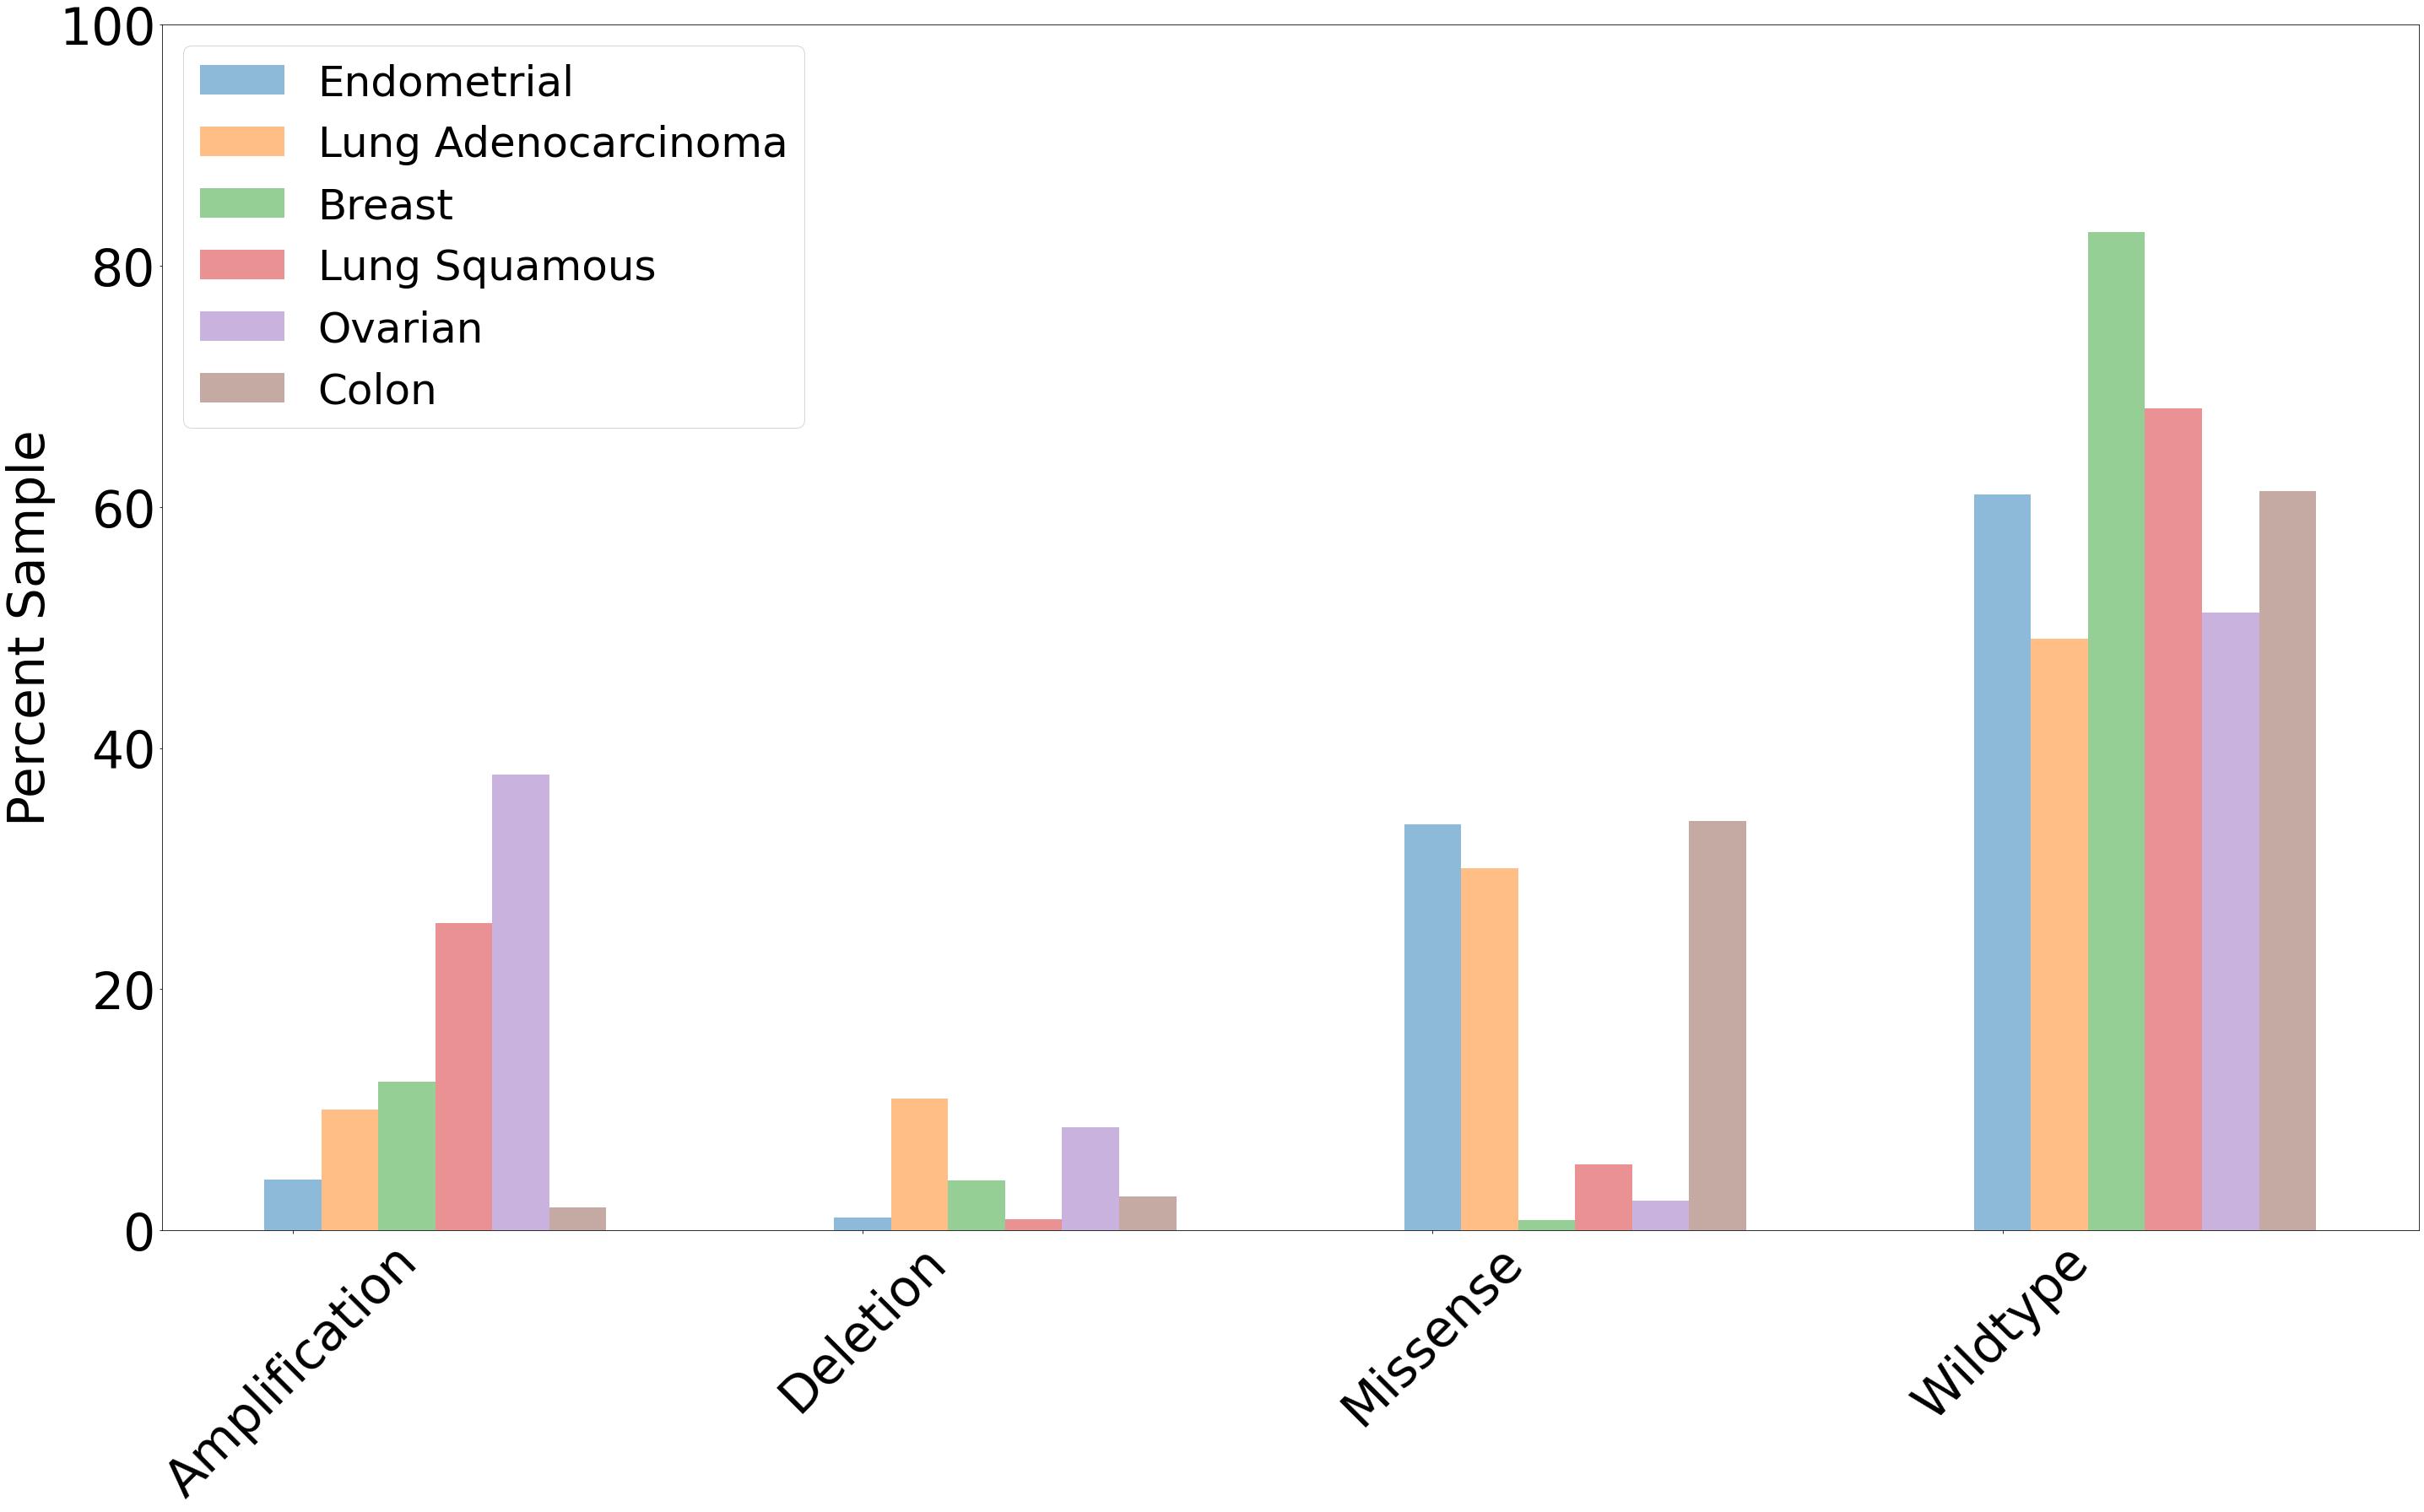

In [8]:
dfs = [endo, ld, brca, lscc, ovar, colon]
for df in dfs:
    df = df.loc[df['Mutation'] != 'Silent']
names = ['Endometrial', 'Lung Adenocarcinoma', 'Breast', 'Lung Squamous', 'Ovarian', 'Colon']

p.figure1_plot_mutations(dfs, names)

# Calculate percentage of missense mutations in tumors

In [9]:
cancer_dfs = {'Endo':endo,'Ov':ovar,'Colon':colon, 
              'Luad':ld, 'Brca':brca, 'Lscc':lscc}
for cancer in cancer_dfs:
    df = cancer_dfs[cancer]
    vc = df.Mutation.value_counts()
    total = len(df)
    mut = vc.Missense
    print(cancer)
    print('total_tumor_samples:',total)
    print(mut,'/',total,'=', mut/total,'\n')

Endo
total_tumor_samples: 95
32 / 95 = 0.3368421052631579 

Ov
total_tumor_samples: 82
2 / 82 = 0.024390243902439025 

Colon
total_tumor_samples: 106
36 / 106 = 0.33962264150943394 

Luad
total_tumor_samples: 110
33 / 110 = 0.3 

Brca
total_tumor_samples: 122
1 / 122 = 0.00819672131147541 

Lscc
total_tumor_samples: 110
6 / 110 = 0.05454545454545454 

